
# Classification

### Demo 1 - Logistic Regression in Python

In this demo, you will apply logistic regression algorithm using scikit-learn library.

---

## Problem Statement

The dataset contain details of users like User ID, Gender, Age, EstimatedSalary and Purchased. The data shows whether a person is likely to purchase the artefacts advertised or not. Based on the data we have to generate a model that can predict whether the person will make a purchase or not.

---

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import metrics

## Dataset

In [2]:
ad_data=pd.read_csv('Social_Network_Ads.csv')
ad_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Data Analysis

In [3]:
#Checking for any null values
ad_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Dataset does not contain any null values means it is not required to replace/remove data.

In [4]:
#Splitting dataset into dependent and independent variables
#Eliminating User ID and Gender as they would not have any impact
X=ad_data[['Age','EstimatedSalary']]
y=ad_data['Purchased']

Feature Scaling

In [5]:
sc = StandardScaler()
X = sc.fit_transform(X)

Using this as there is wide gap between Age and EstimatedSalary and standardizing datasets ensures model is generated properly. The mean should be near to 0 and standard deviation should be near 1 before training the model which is ensured by this

- Training And Testing Set

In [6]:
#Splitting dataset into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

## Logistic Regression Training

Some important hyperparameters that should be considered before training the model:
- __C__: Inverse of regularization strength. Should be float and smaller values specify strong regularization strength.
- __solver__: Algorithm to optimise the problem. Like _'liblinear'_ is used for small datasets while _'sag'_ or _'saga'_ handle large datasets easily
- __multi_class__: To specify either the problem is binary or multiclass. _'ovr'_ is used to specify a binary problem while _'multinominal'_ for a multiclass problem. _'auto'_ selects automatically.

For further information about other parameter you can refer to:
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression'>Logistisc Regression scikit-learn</a> 

In [7]:
lr_ad=LogisticRegression(C=1.0, solver='liblinear', multi_class='ovr')
lr_ad.fit(X_train,y_train)

c:\Workspace\MyProjects\MachineLearning\ml_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

## Visualising Logistic Regression

In [8]:
def plot(X,y,mset):
    p=['Not Purchased','Purchased']
    X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1,   step = 0.01),
                         np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = 0.01))

    #To plot boundaries
    #In general, the space is divided into decision boundaries
    plt.figure(figsize=(8,6))
    plt.contourf(X1, X2, lr_ad.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('#F1674F', '#BEDDB7')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(set(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1],
                    c = ['#F84C51', '#23807A'][i], label = p[j])
    plt.title('Logistic Regression ('+mset+')')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    return plt

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training Set</h3></li></ul>
</div>

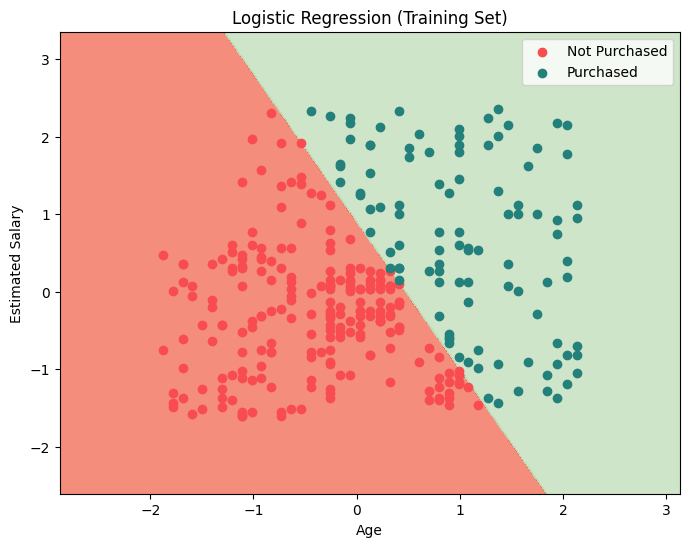

In [9]:
y_pred=lr_ad.predict(X_train)
plt.show(plot(X_train,y_pred,'Training Set'))

<div style="background-color:##EDF9FF">
  <ul><li><h3>Test Set</h3></li></ul>
</div>

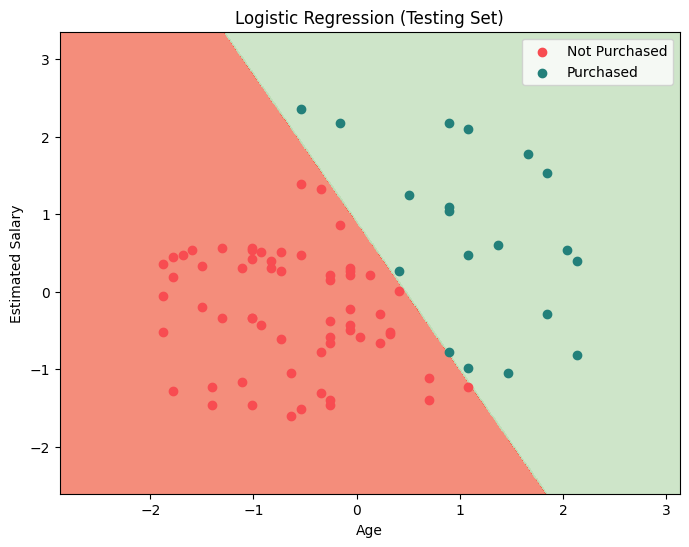

In [10]:
y_pred=lr_ad.predict(X_test)
plt.show(plot(X_test,y_pred,'Testing Set'))

---

## Accuracy Score

In [11]:
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.9125


## Decision Boundary

- Decision boundaries are defined by the threshold value
- Model coefficients define location and orientation of decision boundary
- Since data has two features then boundary hypothesis would be:

    # \begin{equation*}h_{\theta}=g({\theta}_{0}+{\theta}_{1}x_{1}+{\theta}_{2}x_{2})={\theta}^{T}x \end{equation*} 

In [12]:
#For theta_0:
print(lr_ad.intercept_ )
#For theta_1 and theta_2:
print(lr_ad.coef_ )

[-0.95760253]
[[2.01880864 1.05933274]]


---

# Multinominal Logistic Regression

Dataset includes three iris species with 50 samples each and some properties about each flower. 
The columns in this dataset are:

- __Id__: SPL-SPW-PTL-PTW(CM)
- __SepalLengthCm__: Length of the sepal (in cm)
- __SepalWidthCm__: Width of the sepal (in cm)
- __PetalLengthCm__: Length of the petal (in cm)
- __PetalWidthCm__: Width of the petal (in cm)
- __Species__: Species name


## Importing Dataset

In [13]:
#Importing the dataset using pandas
iris_data=pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis

In [14]:
#Dataset shape to get number of rows and columns
iris_data.shape

(150, 6)

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Datatypes</h3></li></ul>
</div>

In [15]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Null Values</h3></li></ul>
</div>

In [16]:
#Checking for null values
iris_data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
    None of the columns contain null values so there is no need to remove/replace data
    </span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Labelencoding Target Variable</h3></li></ul>
</div>

In [17]:
#Using labelencoder to encode the target variable
lb=LabelEncoder()
lb.fit(iris_data['Species'])
iris_data['Species']=lb.transform(iris_data['Species'])


<div style="background-color:##EDF9FF">
  <ul><li><h3>Dividing Feature And Target</h3></li></ul>
</div>

In [18]:
#Divide the dataset into independent and dependent variables
X=iris_data[['SepalWidthCm','PetalWidthCm']]
y=iris_data.Species

<div style="background-color:##EDF9FF">
  <ul><li><h3>Feature Scaling</h3></li></ul>
</div>

In [19]:
#Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

<div style="background-color:##EDF9FF">
  <ul><li><h3>Traing And Testing Set</h3></li></ul>
</div>

In [20]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=0) #20 percent of data will be used for testing purpose

## Logistic Regression Training

In [21]:
#Fitting the model
mlr=LogisticRegression(C=1,solver='lbfgs', multi_class='multinomial')
mlr.fit(X_train,y_train)

c:\Workspace\MyProjects\MachineLearning\ml_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, multi_class='multinomial')

---

## Visualising The Model

In [22]:
def plot_multi(X,y,mset):
    p=lb.classes_
    X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1,   step = 0.01),
                         np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = 0.01))

    #To plot boundaries
    #In general, the space is divided into decision boundaries
    plt.figure(figsize=(8,6))
    plt.contourf(X1, X2, mlr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('#F74E69', '#BDF54E','#72ADDA')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(set(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1],
                    c = ['#BE001E', '#7DBB00','#074C81'][i], label = p[j])
    plt.title('Logistic Regression ('+mset+')')
    plt.xlabel('Sepal Width')
    plt.ylabel('Petal Width')
    plt.legend()
    return plt

### Training Set

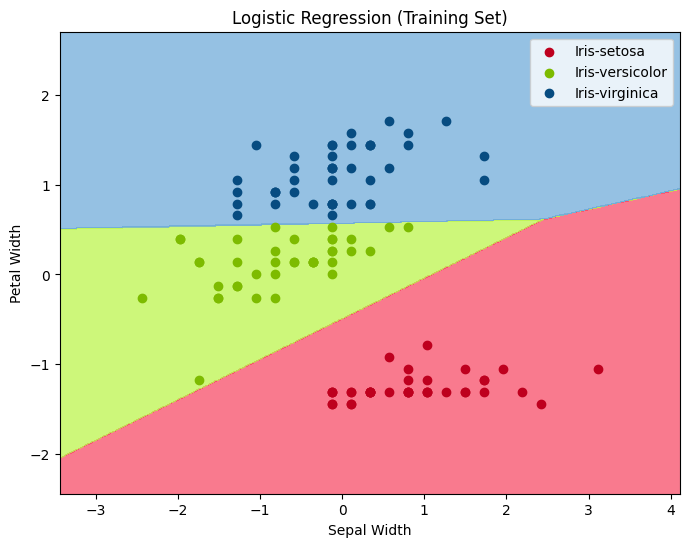

In [23]:
y_mlr=mlr.predict(X_train)
plt.show(plot_multi(X_train,y_mlr,'Training Set'))

<div style="background-color:##EDF9FF">
  <ul><li><h3>Test Set</h3></li></ul>
</div>

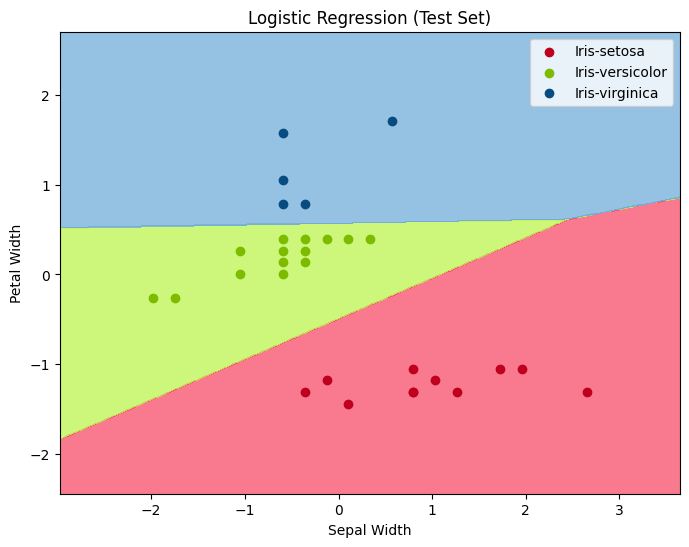

In [24]:
y_mlr=mlr.predict(X_test)
plt.show(plot_multi(X_test,y_mlr,'Test Set'))

## Accuracy Score

In [25]:
mlr_pred=mlr.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,mlr_pred))

Accuracy:  0.9666666666666667


<b><i>Conclusion</i></b>: In this demonstration, we have gained an understanding of how to apply logistic regression algorithm.